In [1]:
pip install pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
DF = pd.read_csv("/content/base-alugueis-sp (1).csv")

In [4]:
## verificando os dados nulos
print(DF.isnull())

       address  district   area  bedrooms  garage   type   rent  total
0        False     False  False     False   False  False  False  False
1        False     False  False     False   False  False  False  False
2        False     False  False     False   False  False  False  False
3        False     False  False     False   False  False  False  False
4        False     False  False     False   False  False  False  False
...        ...       ...    ...       ...     ...    ...    ...    ...
11652    False     False  False     False   False  False  False  False
11653    False     False  False     False   False  False  False  False
11654    False     False  False     False   False  False  False  False
11655    False     False  False     False   False  False  False  False
11656    False     False  False     False   False  False  False  False

[11657 rows x 8 columns]


In [5]:
## usado sum, pois o count costuma somente somar valores NÃO-NULOS
print(DF.isna().sum())

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64


In [6]:
print(DF.isnull().sum())

address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64


In [16]:
## Não existem valores nulos ou ausentes no DF, logo não há necessidade deste tipo de tratamento

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


In [7]:
## Excluir clunas que não serão usadas no modelo e poderiam influenciar
DF_modelo = DF.drop(['address'], axis=1)

In [8]:
DF_modelo =  pd.get_dummies(DF_modelo, drop_first=True)

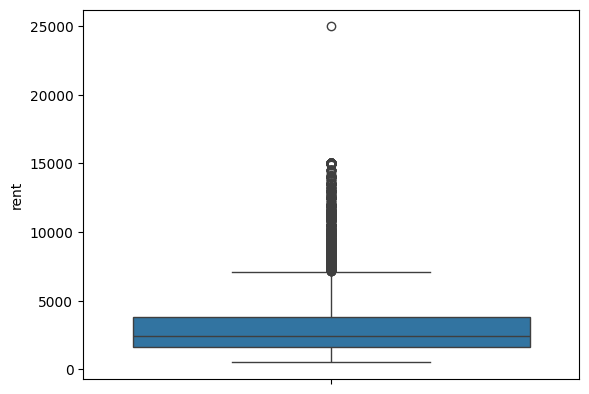

In [9]:
sns.boxplot(DF_modelo['rent'])
plt.show()


In [10]:
# Remover outliers, por exemplo, remover valores acima do percentil 99

q = DF_modelo['rent'].quantile(0.99)
DF_modelo = DF_modelo[DF_modelo['rent'] < q]

In [11]:
## definindo variávias independentes (X) e dependentes (y)
## dividindo em modelo de treino e de teste

x = DF_modelo.drop('rent', axis=1)
y = DF_modelo['rent']

In [12]:
# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(x)


In [13]:
# Dividir os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
## instanciação e treino do modelo de regressão

modelo = LinearRegression()
modelo.fit(x_train, y_train)

## Previsões no modelo de teste
y_pred = modelo.predict(x_test)

In [17]:
# Adicionar as previsões ao DataFrame de teste
x_test = pd.DataFrame(x_test, columns=DF_modelo.drop('rent', axis=1).columns)
x_test['Aluguel_Previsto'] = y_pred
x_test['Aluguel_Atual'] = y_test.values

In [18]:
print(x_test.head())

      area  bedrooms  garage  total  district_Adalgisa  district_Agua Branca  \
5196    70         2       1   3803              False                 False   
6273    76         3       1   4983              False                 False   
2072    43         1       1   4125              False                 False   
7279    52         2       0   2460              False                 False   
5004    23         1       0   2100              False                 False   

      district_Alphaville  \
5196                False   
6273                False   
2072                False   
7279                False   
5004                False   

      district_Alphaville Centro Industrial E Empresarial/alphaville.  \
5196                                              False                 
6273                                              False                 
2072                                              False                 
7279                                              Fa

In [20]:
# Agrupar por área e calcular a média das previsões e dos valores reais
agrupado_por_area = x_test.groupby('area')[['Aluguel_Previsto', 'Aluguel_Atual']].mean().reset_index()


In [22]:
# Exibir as previsões por área
print(agrupado_por_area)

     area  Aluguel_Previsto  Aluguel_Atual
0       0       2135.797671    1600.000000
1      11       2057.814310    2125.000000
2      14       1256.470382    1344.600000
3      15        886.610675    1103.333333
4      16       2134.296931    2306.666667
..    ...               ...            ...
228   487       6722.812270    6900.000000
229   500      13171.299524   11250.000000
230   560      13072.176821   13000.000000
231   568      15467.251441   13500.000000
232   580       9395.932556   11520.000000

[233 rows x 3 columns]


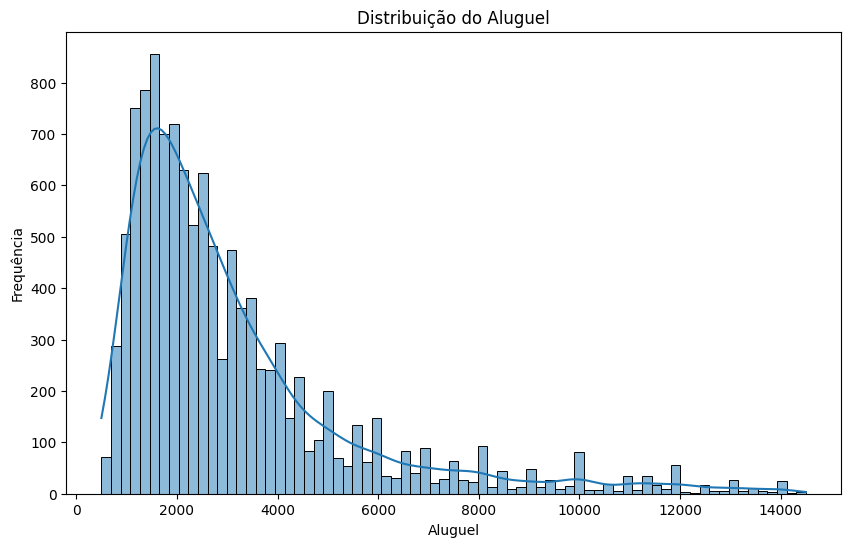

In [25]:
# Histograma para distribuição do aluguel valor original
plt.figure(figsize=(10, 6))
sns.histplot(DF_modelo['rent'], kde=True)
plt.title('Distribuição do Aluguel')
plt.xlabel('Aluguel')
plt.ylabel('Frequência')
plt.show()

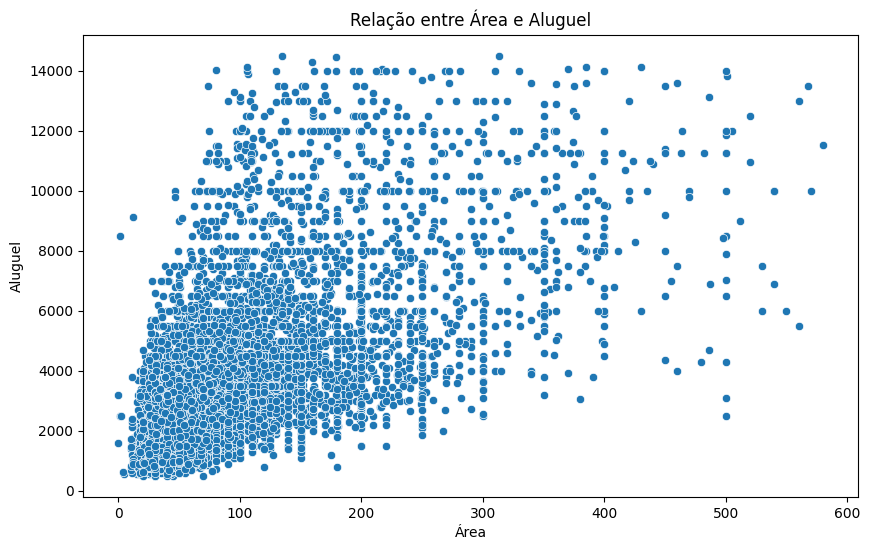

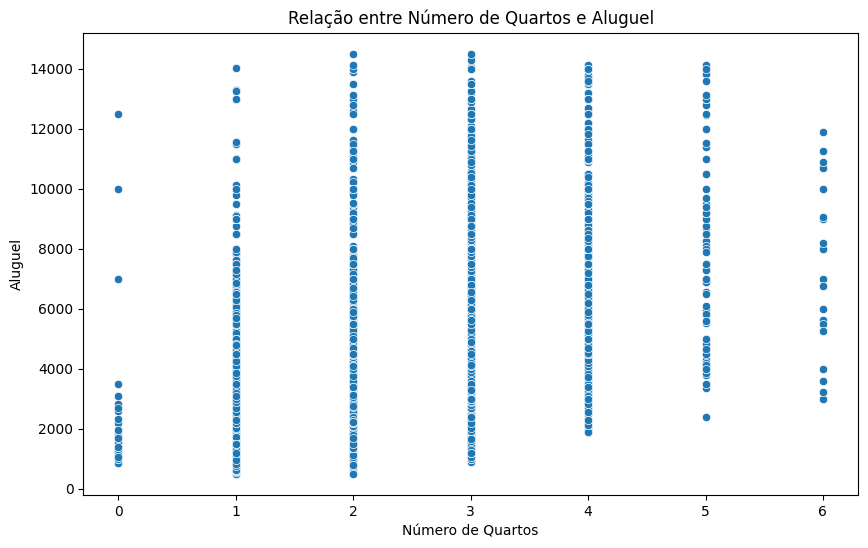

In [26]:
# Scatter plot para relação entre aluguel e área
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='rent', data=DF_modelo)
plt.title('Relação entre Área e Aluguel')
plt.xlabel('Área')
plt.ylabel('Aluguel')
plt.show()

# Scatter plot para relação entre aluguel e número de quartos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='rent', data=DF_modelo)
plt.title('Relação entre Número de Quartos e Aluguel')
plt.xlabel('Número de Quartos')
plt.ylabel('Aluguel')
plt.show()


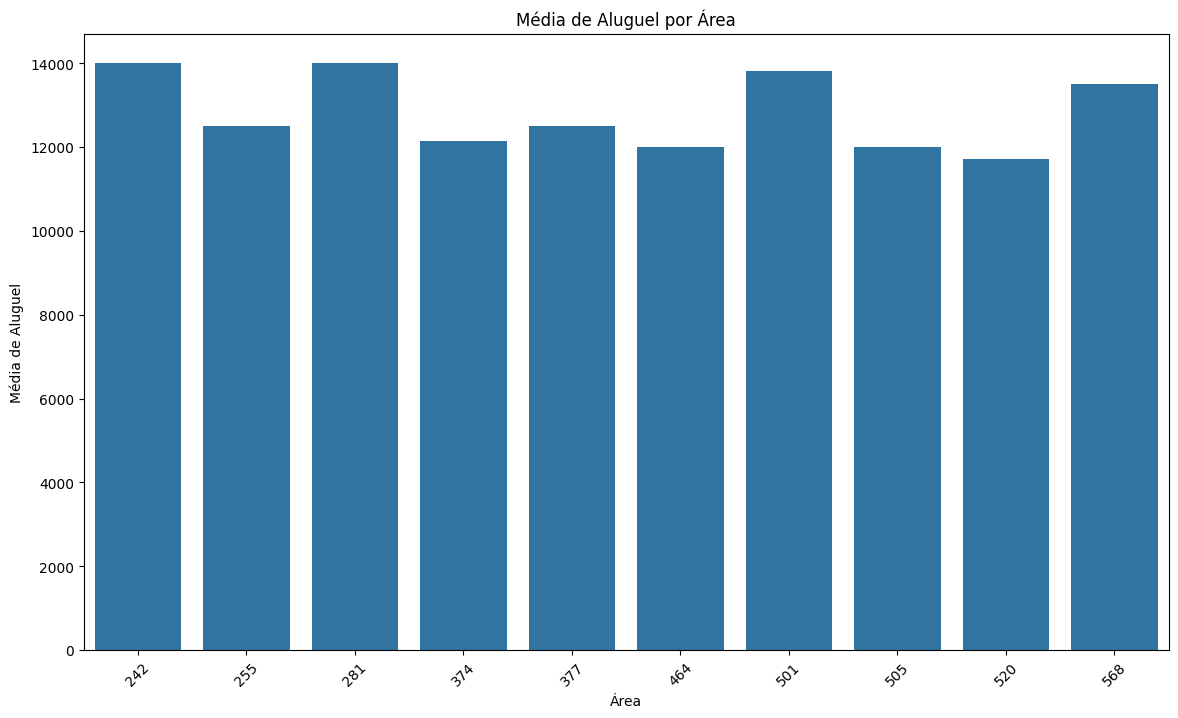

In [30]:

# Gráfico de barras para média de aluguel por área
agrupado_por_area = DF_modelo.groupby('area')['rent'].mean().reset_index()
# Ordenar e selecionar as 10 áreas com maior média de aluguel para visualização
top_10_areas = agrupado_por_area.sort_values(by='rent', ascending=False).head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x='area', y='rent', data=top_10_areas)
plt.title('Média de Aluguel por Área')
plt.xlabel('Área')
plt.ylabel('Média de Aluguel')
plt.xticks(rotation=45)
plt.show()

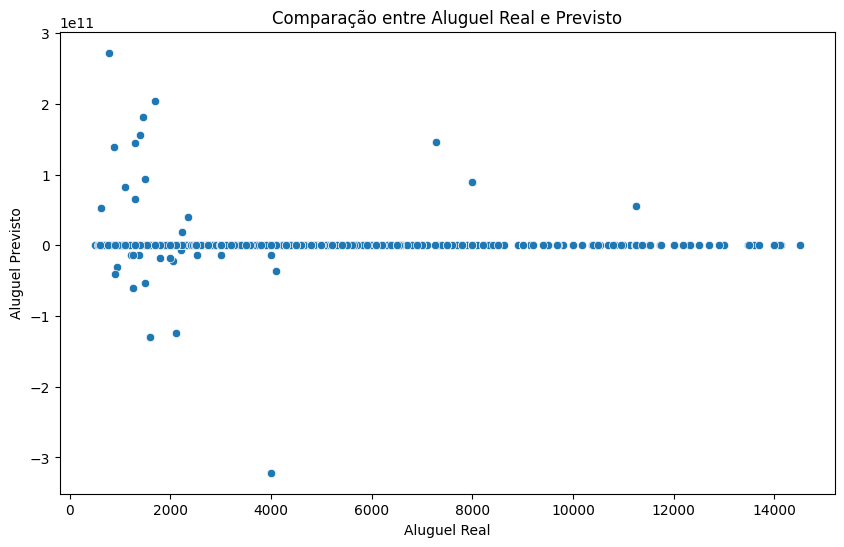

In [32]:
# Scatter plot para comparar valores reais e previstos de aluguel
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Aluguel_Atual', y='Aluguel_Previsto', data=x_test)
plt.title('Comparação entre Aluguel Real e Previsto')
plt.xlabel('Aluguel Real')
plt.ylabel('Aluguel Previsto')
plt.show()

<Figure size 1400x800 with 0 Axes>

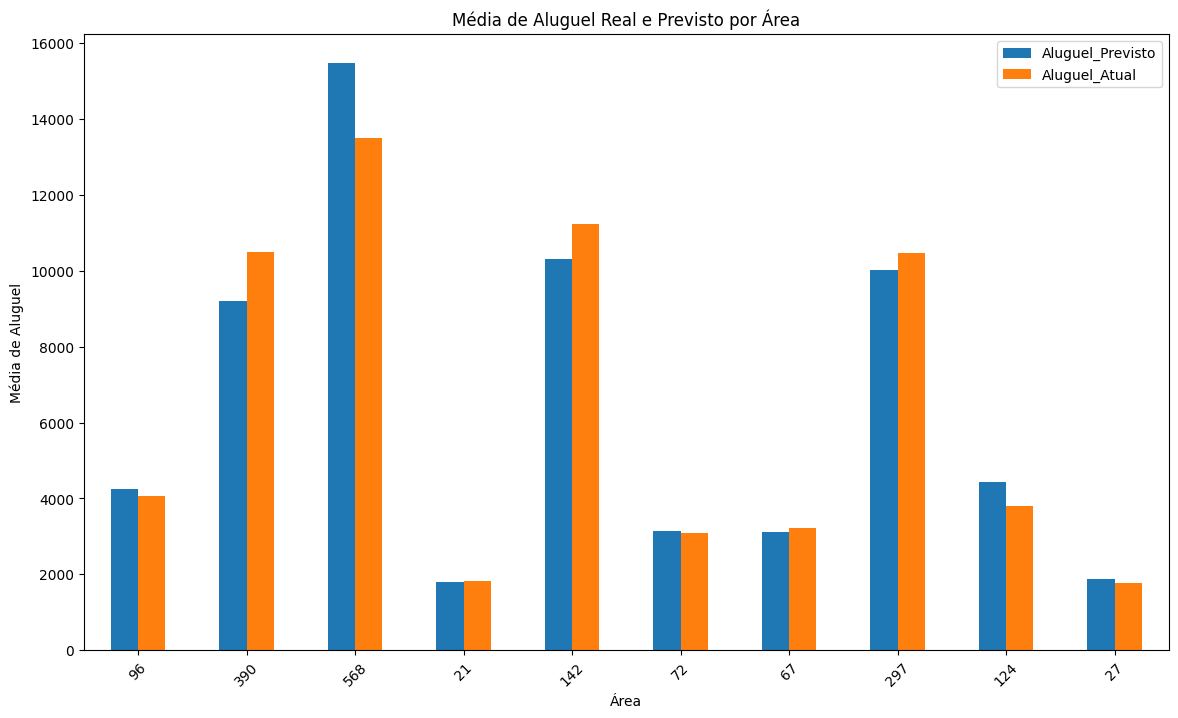

In [40]:
# Agrupar por área e calcular a média das previsões e dos valores reais
previsoes_agrupado = x_test.groupby('area')[['Aluguel_Previsto', 'Aluguel_Atual']].mean().reset_index()

# Amostragem aleatória de áreas (por exemplo, 10 áreas)
areas_exemplo = previsoes_agrupado.sample(n=10, random_state=42)

plt.figure(figsize=(14, 8))
areas_exemplo.plot(kind='bar', x='area', figsize=(14, 8))
plt.title('Média de Aluguel Real e Previsto por Área')
plt.xlabel('Área')
plt.ylabel('Média de Aluguel')
plt.xticks(rotation=45)
plt.show()



## Previsões feitas pelo modelo

Pode-se inferir que o modelo possui um bom ajuste, visto que não está gerando valores muito acima ou muito abaixo. Tendendo a ter uma variação natural, ou até mesmo, uma manutenção de valores. No gráfico atual foram selecionadas randomicamente 10 áreas diferentes para uma amostragem da previsão do modelo.
